In [2]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
# Read in the data as a count matrix
# How do I know which function to use? Just them one by one
adata = sc.read_text("data/GSE100426_SC_counts.txt.gz")
# I print it so that after running, you know it's done
print(adata)

AnnData object with n_obs × n_vars = 23366 × 2112 


The output is a AnnData object
- To understand the structure of the data, go to [link](https://icb-anndata.readthedocs-hosted.com/en/stable/anndata.AnnData.html#anndata-anndata).
- You can find the documentation for AnnData object [here](https://icb-anndata.readthedocs-hosted.com/en/stable/anndata.AnnData.html#anndata-anndata).

In [12]:
# check out the variables and data in AnnData
print(adata.obs_names)
print(adata.var_names)
print(adata.X)

Index(['0610005C13Rik', '0610007N19Rik', '0610007P14Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik', '0610009D07Rik', '0610009L18Rik',
       '0610009O20Rik', '0610010B08Rik',
       ...
       'Zwilch', 'Zwint', 'Zxda', 'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx',
       'Zzef1', 'Zzz3'],
      dtype='object', length=23366)
Index(['LT_old_mouse2_plate1_nostim_pop_H4_S280',
       'LT_old_mouse2_plate1_nostim_sc_A1_S193',
       'LT_old_mouse2_plate1_nostim_sc_A2_S194',
       'LT_old_mouse2_plate1_nostim_sc_A3_S195',
       'LT_old_mouse2_plate1_nostim_sc_A4_S196',
       'LT_old_mouse2_plate1_nostim_sc_B1_S205',
       'LT_old_mouse2_plate1_nostim_sc_B2_S206',
       'LT_old_mouse2_plate1_nostim_sc_B3_S207',
       'LT_old_mouse2_plate1_nostim_sc_B4_S208',
       'LT_old_mouse2_plate1_nostim_sc_C1_S217',
       ...
       'ST_young3_stim_pl2_7082015_F7', 'ST_young3_stim_pl2_7082015_F8',
       'ST_young3_stim_pl2_7082015_G5', 'ST_young3_stim_pl2_7082015_G6',
       'ST_y

By convention, a count matrix has all genes as rows while all cells as columns. However, in data science, all observations (cells) must be rows and all variables (genes) must be columns. Therefore, we need to transpose the matrix above.

In [4]:
adata = adata.T
# double check again the variables and data in AnnData
print(adata.obs_names)
print(adata.var_names)
print(adata.X)

Index(['LT_old_mouse2_plate1_nostim_pop_H4_S280',
       'LT_old_mouse2_plate1_nostim_sc_A1_S193',
       'LT_old_mouse2_plate1_nostim_sc_A2_S194',
       'LT_old_mouse2_plate1_nostim_sc_A3_S195',
       'LT_old_mouse2_plate1_nostim_sc_A4_S196',
       'LT_old_mouse2_plate1_nostim_sc_B1_S205',
       'LT_old_mouse2_plate1_nostim_sc_B2_S206',
       'LT_old_mouse2_plate1_nostim_sc_B3_S207',
       'LT_old_mouse2_plate1_nostim_sc_B4_S208',
       'LT_old_mouse2_plate1_nostim_sc_C1_S217',
       ...
       'ST_young3_stim_pl2_7082015_F7', 'ST_young3_stim_pl2_7082015_F8',
       'ST_young3_stim_pl2_7082015_G5', 'ST_young3_stim_pl2_7082015_G6',
       'ST_young3_stim_pl2_7082015_G7', 'ST_young3_stim_pl2_7082015_G8',
       'ST_young3_stim_pl2_7082015_H5', 'ST_young3_stim_pl2_7082015_H6',
       'ST_young3_stim_pl2_7082015_H7', 'ST_young3_stim_pl2_7082015_H8'],
      dtype='object', length=2112)
Index(['0610005C13Rik', '0610007N19Rik', '0610007P14Rik', '0610008F07Rik',
       '0610009B14Rik'

Here is an example where we visualize high CD61 expressing LT-HSCs, young mouse, non-stimulated cells from the dataset.
You can choose the condition you want to visualize by filtering the observation names.

In [5]:
# Get the cell names
cell_names = adata.obs_names
young_nonstim_cell_names = [name for name in cell_names if re.compile('LT_young.*nostim.*').match(name)]
print("We have ", len(young_nonstim_cell_names), " cells in total.")
# Subset the AnnData data frame
adata_subset = adata[young_nonstim_cell_names, :]
print(adata_subset.obs_names)

We have  128  cells in total.
Index(['LT_young_mouse1_plate1_nostim_pop_H4_S664',
       'LT_young_mouse1_plate1_nostim_sc_A1_S577',
       'LT_young_mouse1_plate1_nostim_sc_A2_S578',
       'LT_young_mouse1_plate1_nostim_sc_A3_S579',
       'LT_young_mouse1_plate1_nostim_sc_A4_S580',
       'LT_young_mouse1_plate1_nostim_sc_B1_S589',
       'LT_young_mouse1_plate1_nostim_sc_B2_S590',
       'LT_young_mouse1_plate1_nostim_sc_B3_S591',
       'LT_young_mouse1_plate1_nostim_sc_B4_S592',
       'LT_young_mouse1_plate1_nostim_sc_C1_S601',
       ...
       'LT_young1_nostim_pl2_7082015_F3', 'LT_young1_nostim_pl2_7082015_F4',
       'LT_young1_nostim_pl2_7082015_G1', 'LT_young1_nostim_pl2_7082015_G2',
       'LT_young1_nostim_pl2_7082015_G3', 'LT_young1_nostim_pl2_7082015_G4',
       'LT_young1_nostim_pl2_7082015_H1', 'LT_young1_nostim_pl2_7082015_H2',
       'LT_young1_nostim_pl2_7082015_H3', 'LT_young1_nostim_pl2_7082015_H4'],
      dtype='object', length=128)


In [6]:
# You can filter the cells and/or genes.
# This is a simple filter that requires 
# a gene to be expressed in at least three cells and 
# a cell to express at least 200 genes
sc.pp.filter_cells(adata_subset, min_genes=200)
sc.pp.filter_genes(adata_subset, min_cells=3)
# We end up with a filtered subset of genes and cells
print(adata_subset)

Trying to set attribute `.obs` of view, making a copy.


AnnData object with n_obs × n_vars = 103 × 12552 
    obs: 'n_genes'
    var: 'n_cells'


The following operation is not done since mitochrondia genes are not readily available.
```
# If a lot of mitochondria genes are recovered in the scRNA-seq data, it means apoptosis happened in that cell.
# We don't want those cells. Let's visualize our data.
# Below is directly copied from the scanpy tutorial
mito_genes = adata_subset.var_names.str.startswith('MT-')
adata_subset.obs['n_genes'] = np.count_nonzero(adata_subset.X, axis=1)
# for each cell compute fraction of counts in mito genes vs. all genes
adata_subset.obs['percent_mito'] = np.sum(
    adata_subset[:, mito_genes].X, axis=1) / np.sum(adata_subset.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata_subset.obs['n_counts'] = adata_subset.X.sum(axis=1)
sc.pl.violin(adata_subset, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)
```

## Normalization
Data normalization is being used in data visualization
However, there is a debate on whether this is correct.
We just show it here as an example.

In [7]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata

## Visualization with dimensionality reduction
- First, we take a look at the most variable genes in these cells
- Second, we will visualize the data with a 2D manifold. ([What is a manifold?](https://en.wikipedia.org/wiki/Manifold))
This steps is based on [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).
A pre-filtering step is usually done to avoid bugs (e.g. ill-posed covariance matrix).
This is usually achieved by taking the most variable genes

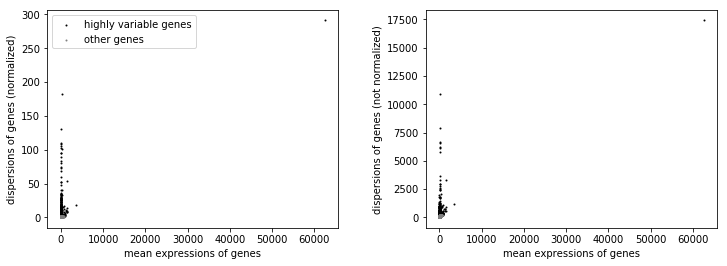

In [8]:
# In scanpy package, usually you do your computation first, and then plot it
# Computation is done wihtin sc.pp, More advanced computation was done with sc.tl
# Plotting is done with sc.pl
sc.pp.highly_variable_genes(adata_subset, flavor='cell_ranger', n_top_genes=2000)
sc.pl.highly_variable_genes(adata_subset)

In [38]:
# Now we do dimensionality reduction
# It should be noted that only highly variable expressed genes were used for PCA
sc.pp.pca(adata_subset, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata_subset)

sc.tl.louvain(adata_subset)
# sc.tl.tsne(adata_subset) # tsne is slowly being abandoned now
sc.tl.umap(adata_subset)
# sc.tl.diffmap(adata_subset) # Let's ignore this for now
sc.tl.draw_graph(adata_subset)

ImportError: libicui18n.so.58: cannot open shared object file: No such file or directory

I show an example of how to debug here.
I got an error message of ImportError but I have no idea what it is. What should I do???

Panic? No! Don't Panic! Google it!
Here is what I got: 
- [Google Search Result](https://www.google.com/search?q=ImportError%3A+libicui18n.so.58%3A+cannot+open+shared+object+file%3A+No+such+file+or+directory&oq=ImportError%3A+libicui18n.so.58%3A+cannot+open+shared+object+file%3A+No+such+file+or+directory&aqs=chrome..69i57j69i58.294j0j4&sourceid=chrome&ie=UTF-8)
- [Stackoverflow solution](https://stackoverflow.com/questions/48365494/pyicu-in-python-3-error-importerror-libicui18n-so-58)

Appearently, I'm missing a package that is required for scanpy. Why? I don't know and I don't care. I just want to make it work by installing it again.
```
# run this in your conda
conda install pyicu
```
Conda is usually slow but works most of the time.
> Note: the way I actually solved this issue is a little bit more complicated that this. If you have issues, let me know.

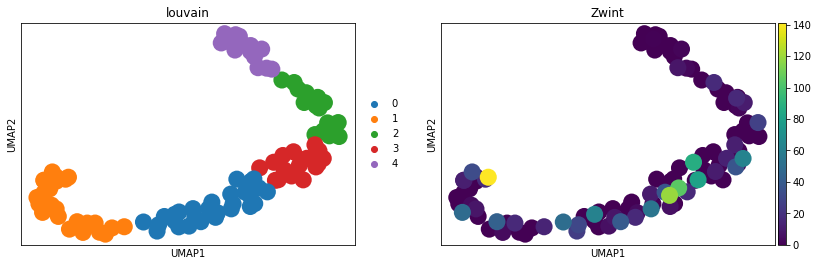

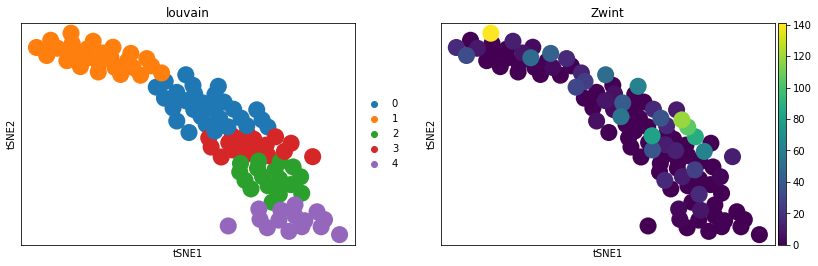

In [14]:
# Now I can do it again
sc.pp.pca(adata_subset, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata_subset)

sc.tl.louvain(adata_subset)
sc.tl.tsne(adata_subset)
sc.tl.umap(adata_subset)
sc.tl.draw_graph(adata_subset)

# plot it
sc.pl.tsne(adata_subset, color=['louvain', 'Zwint'])
sc.pl.umap(adata_subset, color=['louvain', 'Zwint'])

# Differentially expressed genes (Simple way)
Now we start to look at differentially expressed genes between different clusters.
> Note: This is not across multiple conditions.

                                           n_genes louvain
LT_young_mouse1_plate1_nostim_pop_H4_S664     7501       4
LT_young_mouse1_plate1_nostim_sc_A1_S577      4165       2
LT_young_mouse1_plate1_nostim_sc_A2_S578      4291       2
LT_young_mouse1_plate1_nostim_sc_A3_S579      3787       2
LT_young_mouse1_plate1_nostim_sc_A4_S580      4035       2
...                                            ...     ...
LT_young1_nostim_pl2_7082015_G4               1974       4
LT_young1_nostim_pl2_7082015_H1               4147       1
LT_young1_nostim_pl2_7082015_H2               5768       1
LT_young1_nostim_pl2_7082015_H3               4650       1
LT_young1_nostim_pl2_7082015_H4                233       4

[103 rows x 2 columns]


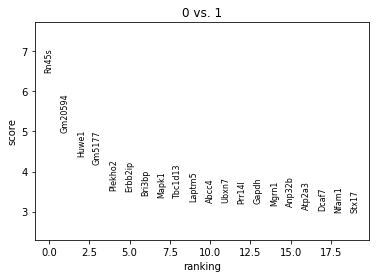

In [35]:
# you can change the way comparison worked on
# the second argument defines which column to look up for grouping
# we choose louvain here, you can choose your own
# you can choose the method you want to use or just use the default
# there is no standard answer, try and see which works for you
print(adata_subset.obs)
sc.tl.rank_genes_groups(adata_subset, 'louvain', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata_subset, groups=['0'], n_genes=20)

In [46]:
# Now we can go back to the complete dataset and make a new grouping ourself
# Here I only group by experiments of young vs. old and stimulated vs. non-stimulated.
# You can also group by FACS sorted cell types like LC
# This section requires a little bit of knowledge about data structures
experimental_group = []
group_patterns = {
    '.*young.*_nostim.*': "young_nostim",
    '.*young.*_stim.*': "young_stim",
    '.*old.*_nostim.*': "old_nostim",
    '.*old.*_stim.*': "old_stim",
                 }
for name in adata.obs_names:
    has_group = False
    for pattern, group in group_patterns.items():
        if re.compile(pattern).match(name):
            experimental_group.append(group)
            has_group = True
            break
    if not has_group:
        experiment_group.append("Others")
# Subset the AnnData data frame
adata.obs["experiment"] = experimental_group
print(adata.obs)

                                         experiment
LT_old_mouse2_plate1_nostim_pop_H4_S280  old_nostim
LT_old_mouse2_plate1_nostim_sc_A1_S193   old_nostim
LT_old_mouse2_plate1_nostim_sc_A2_S194   old_nostim
LT_old_mouse2_plate1_nostim_sc_A3_S195   old_nostim
LT_old_mouse2_plate1_nostim_sc_A4_S196   old_nostim
...                                             ...
ST_young3_stim_pl2_7082015_G8            young_stim
ST_young3_stim_pl2_7082015_H5            young_stim
ST_young3_stim_pl2_7082015_H6            young_stim
ST_young3_stim_pl2_7082015_H7            young_stim
ST_young3_stim_pl2_7082015_H8            young_stim

[2112 rows x 1 columns]


/home/huanjie/anaconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:325: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(means[imask]) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/home/huanjie/anaconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:325: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (np.expm1(means[imask]) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/home/huanjie/anaconda3/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:332: RuntimeWarning: divide by zero encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


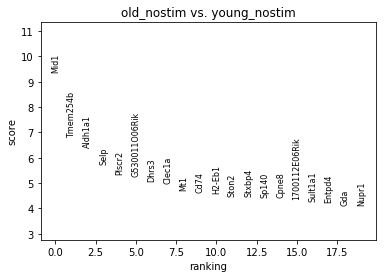

In [55]:
# Using this, we can rank differentially expressed genes!
### VERY IMPORTANT ###
# WE HAVE NOT DONE ALL PREPROCESSING ON THE WHOLE DATASET YET
# WHEN YOU DO IT YOURSELF, YOU SHOULD DO ALL THE PREPROCESSING FIRST
# here we just do some basic filtering
sc.pp.filter_cells(adata_subset, min_genes=200)
sc.pp.filter_genes(adata_subset, min_cells=3)
sc.tl.rank_genes_groups(adata, 'experiment', groups=['old_nostim'], reference='young_nostim', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['old_nostim'], n_genes=20)

# Differential expression analysis (A little more advanced)
Now we use a different package provided by the same lab for differentially expressed gene analysis
The package is called `diffxpy` and it implements Generalized Linear Model (GLM) in Python with TensorFlow.
You can find the tutorial [here](https://github.com/theislab/diffxpy).

We use an example with a [Wald test](https://en.wikipedia.org/wiki/Wald_test), which is basically a Chi-squared test of the coefficients.

In [51]:
import diffxpy.api as de

/home/huanjie/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/huanjie/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/huanjie/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/huanjie/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [65]:
# To do the test, we need to prepare the conditions again.
# Yes, Again!
age_group = []
stim_group = []
for name in adata.obs_names:
    if re.compile(".*young.*").match(name):
        age_group.append("young")
    elif re.compile(".*old.*").match(name):
        age_group.append("old")
    else:
        age_group.append("unknown")
        
    if re.compile(".*_nostim.*").match(name):
        stim_group.append("nostim")
    elif re.compile(".*_stim.*").match(name):
        stim_group.append("stim")
    else:
        stim_group.append("unknown")
        
# Subset the AnnData data frame
adata.obs["age_group"] = age_group
adata.obs["stim_group"] = stim_group

['old' 'young']


In [74]:
de.utils.preview_coef_names(
    sample_description=adata.obs,
    formula="~ 1 + age_group"
)
# this is not working
# this package is shaddy
# we switch to R from here
try:
    test = de.test.wald(
        data=adata,
        formula_loc="~ 1 + age_group",
        factor_loc_totest="age_group"
    )
    print(test.summary())
except:
    print("done")

done


In [68]:
from batchglm.api.models.tf1.glm_nb import Simulator
import anndata

sim = Simulator(num_observations=200, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=2)
sim.generate_params(
    rand_fn_loc=lambda shape: np.random.uniform(-0.1, 0.1, shape),
    rand_fn_scale=lambda shape: np.random.uniform(0.1, 2, shape)
)
sim.generate_data()

data = anndata.AnnData(
    X=sim.x,
    var=pd.DataFrame(index=["gene" + str(i) for i in range(sim.x.shape[1])]),
    obs=sim.sample_description
)
print(data.obs)
de.utils.preview_coef_names(
    sample_description=data.obs,
    formula="~ 1 + condition"
)
test = de.test.wald(
    data=data,
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition"
)
print(test.summary())

Transforming to str index.


    condition batch
0           0     0
1           1     0
2           0     0
3           1     0
4           0     0
..        ...   ...
195         1     0
196         0     0
197         1     0
198         0     0
199         1     0

[200 rows x 2 columns]
      gene      pval      qval    log2fc        mean  zero_mean      grad  \
0    gene0  0.006206  0.233557 -0.119289  499.464996      False  0.015370   
1    gene1  0.290654  0.692033  0.100933  532.289978      False  0.015432   
2    gene2  0.369548  0.797348 -0.088750  479.190002      False  0.100291   
3    gene3  0.725887  0.908682  0.034418  524.770020      False  0.031673   
4    gene4  0.163816  0.585057  0.131309  526.080017      False  0.101618   
..     ...       ...       ...       ...         ...        ...       ...   
95  gene95  0.018028  0.233557 -0.105818  498.204987      False  0.023847   
96  gene96  0.643322  0.898871  0.062262  522.635010      False  0.074871   
97  gene97  0.535686  0.892811 -0.036353  4